Dataset Creation

In [1]:
#Import necessary libraries
import cv2
import os

# Create a directory to save the captured images
output_dir = '/Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Initialize the webcam
cap = cv2.VideoCapture(1)

# Define the coordinates of the region of interest (ROI) box
roi_x, roi_y, roi_width, roi_height = 80, 80, 250, 250

while True:
    # Capture a frame from the webcam
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding to convert to black and white
    _, bw_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # Invert the colors (hand appears white, background appears black)
    inverted_bw_image = cv2.bitwise_not(bw_image)

    # Extract the hand region within the ROI
    hand_roi = inverted_bw_image[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width]

    # Draw the ROI box on the frame
    cv2.rectangle(frame, (roi_x, roi_y), (roi_x + roi_width, roi_y + roi_height), (0, 255, 0), 2)

    # Display the frame with ROI
    cv2.imshow('Capture Your Hand', frame)

    # Display the hand region
    cv2.imshow('Hand Region', hand_roi)

    # Automatically save the image
    image_filename = os.path.join(output_dir, f'captured_hand_{len(os.listdir(output_dir)) + 1}.png')
    cv2.imwrite(image_filename, hand_roi)
    print(f'Saved: {image_filename}')

    # Press 'q' to quit the capture loop
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

# Release the webcam and close the windows
cap.release()
cv2.destroyAllWindows()


2024-05-26 12:43:18.801 Python[5943:266923] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_1.png
Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_2.png
Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_3.png
Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_4.png


2024-05-26 12:43:20.236 Python[5943:266923] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_5.png
Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_6.png
Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_7.png
Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_8.png
Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_9.png
Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_10.png
Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_11.png
Saved: /Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra  files/Hand_Gestures/Del/captured_hand_12.p

KeyboardInterrupt: 

: 

Display of an image from each class from dataset created

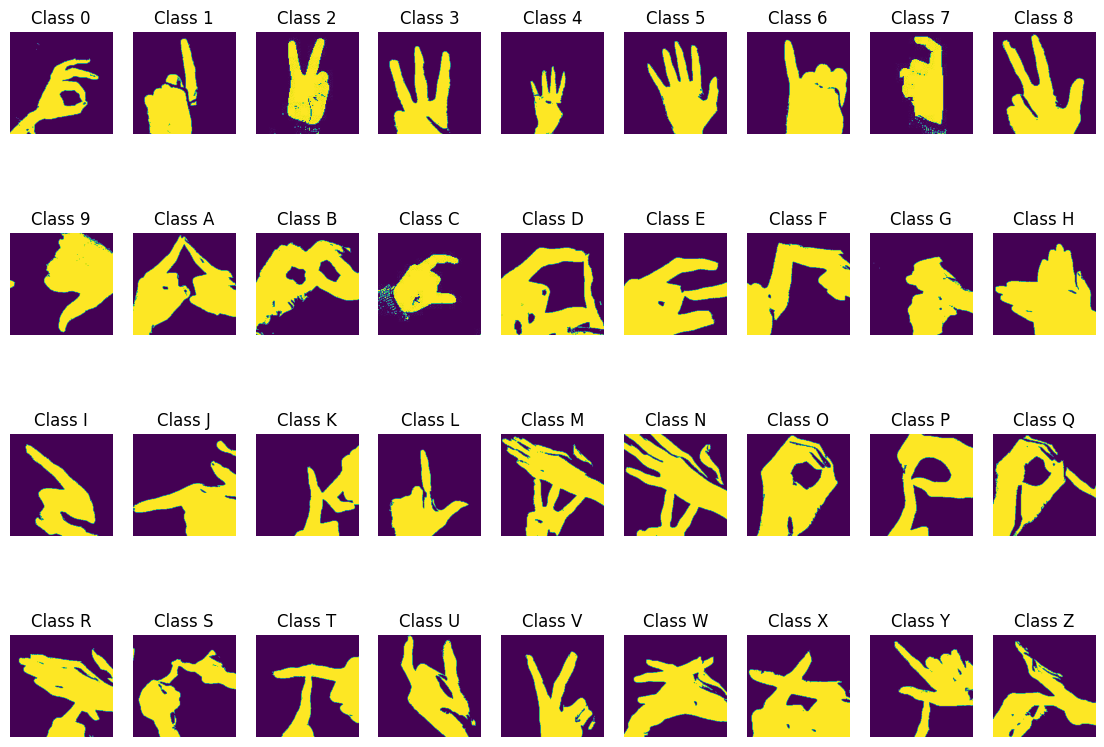

In [9]:
#Import necessary libraries
import matplotlib.pyplot as plt
import os
from PIL import Image

def create_class_image_grid(dataset_folder, grid_size):
    # Get a list of class folders in the dataset directory
    classes = sorted([d for d in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, d))])

    # Check if there are enough classes for the specified grid size
    if len(classes) < grid_size:
        print(f"Not enough classes in the folder. Found {len(classes)} classes, but grid size is set to {grid_size}.")
        return

    # Select the first 'grid_size' classes
    classes = classes[:grid_size]

    # Create a grid of subplots for displaying images
    fig, axs = plt.subplots(4, 9, figsize=(14, 10))

    # Iterate through each class and display the first image in each class
    for i, class_name in enumerate(classes):
        class_folder = os.path.join(dataset_folder, class_name)

        # Get a list of image files in the class folder
        images = sorted([f for f in os.listdir(class_folder) if f.endswith(('.jpg', '.png', '.jpeg'))])

        # Check if there are images in the class folder
        if not images:
            print(f"No images found for class {class_name}.")
            continue

        # Load the first image in the class
        img_path = os.path.join(class_folder, images[0])
        img = Image.open(img_path)

        # Set up the subplot for the current class
        ax = axs[i // 9, i % 9]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Class {class_name}")

    # Display the grid of images
    plt.show()

if __name__ == "__main__":
    # Specify the path to the dataset folder
    dataset_folder = '/Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/Extra files/Selected Dataset'

    # Specify the desired grid size
    grid_size = 36

    # Call the function to create and display the image grid
    create_class_image_grid(dataset_folder, grid_size)


Display the count of image in each class

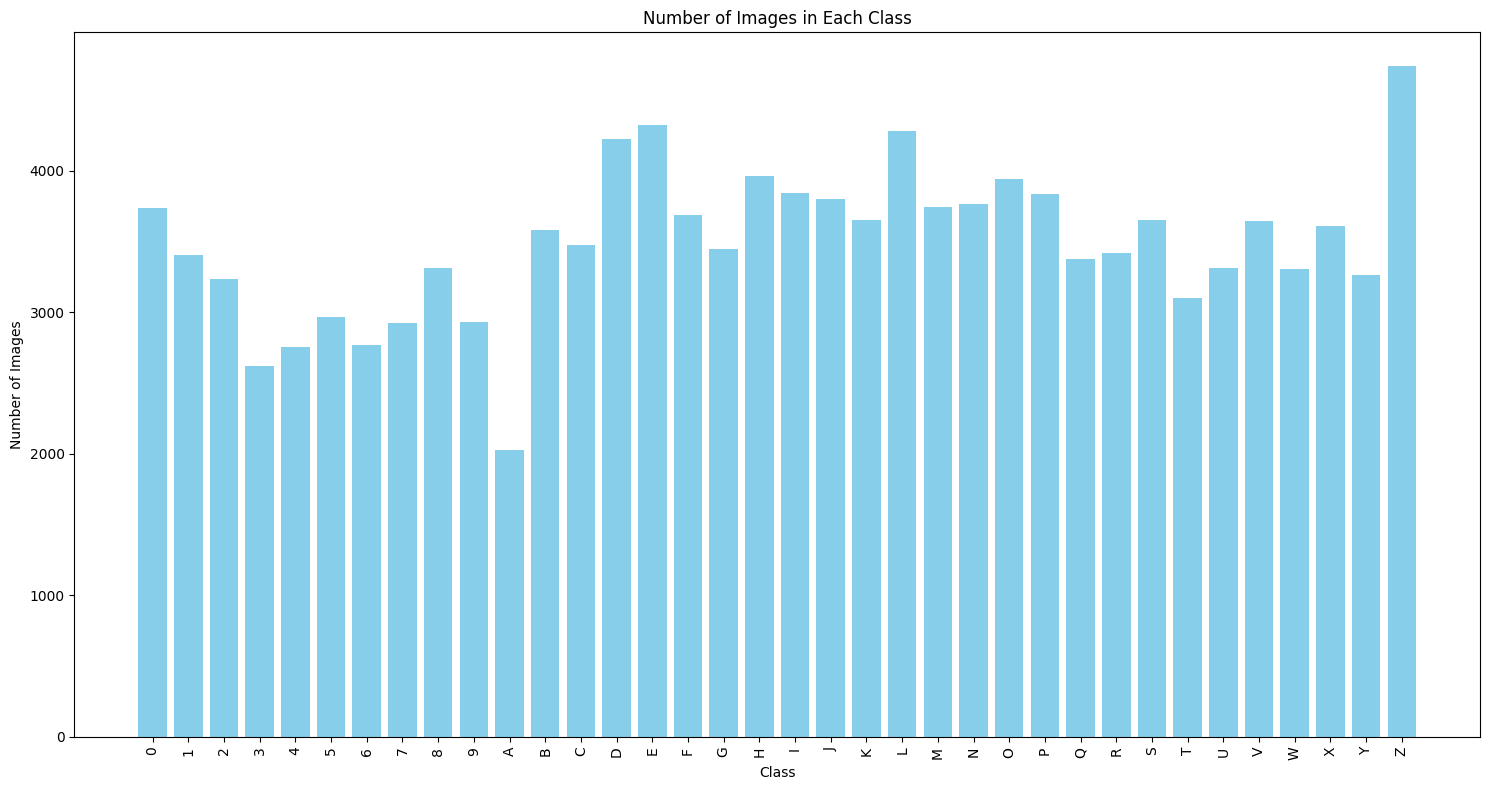

In [10]:
#Import necessary libraries
import os
import matplotlib.pyplot as plt

# Define the path to your dataset
dataset_path = '/Users/sujaykaushik/Documents/Msc DataScience/Project Dissertation/All Files (Code & Dataset)/Sign_Lang_Custom_Dataset _Final copy'

# Initialize an empty dictionary to store class-wise image counts
class_counts = {}

# Iterate through each class folder
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        # Count the number of images in each class
        image_count = len(os.listdir(class_path))
        class_counts[class_folder] = image_count

# Sort the dictionary by class names
sorted_class_counts = dict(sorted(class_counts.items()))

# Plot the bar chart
plt.figure(figsize=(15, 8))
plt.bar(sorted_class_counts.keys(), sorted_class_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()
